In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

from sklearn.cluster import KMeans

In [90]:
df = pd.read_csv('hibsfinal2.csv')


In [91]:
df = df.loc[(df['playerId']==74351)].reset_index()

In [92]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8


In [93]:
df.columns

Index(['index', 'x', 'y', 'type/displayName', 'playerId', 'endX', 'endY'], dtype='object')

In [94]:
df['x'] = df.loc[:,'x'] 
df['y'] = df.loc[:,'y'] 
df['endX'] = df.loc[:,'endX'] 
df['endY'] = df.loc[:,'endY'] 


In [95]:
df.head()

,index,x,y,type/displayName,playerId,endX,endY
0,17,28.32,0.00,Pass,74351,38.28,9.28
1,19,34.68,3.20,Pass,74351,37.32,13.52
2,68,24.96,13.92,Pass,74351,37.08,2.00
3,70,32.28,16.56,Pass,74351,25.32,53.44
4,78,63.60,5.84,Pass,74351,67.56,4.16


In [96]:

X = np.array(df[['x','y','endX','endY']])
kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)



In [97]:
df.head()

,index,x,y,type/displayName,playerId,endX,endY,cluster
0,17,28.32,0.00,Pass,74351,38.28,9.28,1
1,19,34.68,3.20,Pass,74351,37.32,13.52,1
2,68,24.96,13.92,Pass,74351,37.08,2.00,1
3,70,32.28,16.56,Pass,74351,25.32,53.44,5
4,78,63.60,5.84,Pass,74351,67.56,4.16,9


In [98]:


df.cluster.value_counts()


9    43
1    33
3    29
4    24
7    19
0    19
2    16
8     8
6     8
5     6
Name: cluster, dtype: int64

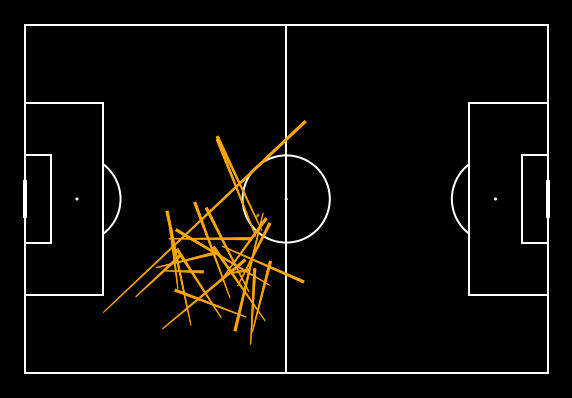

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#000000')
ax.patch.set_facecolor('#000000')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',
             pitch_color='#000000',line_color='white',figsize=(10,10),
             constrained_layout=False,tight_layout=True,view='full')

pitch.draw(ax=ax)

plt.gca().invert_yaxis()

for x in range(len(df['cluster'])):
    
    if df['cluster'][x] ==4:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='orange',lw=3,zorder=2,comet=True,ax=ax)
        
plt.savefig('cluster4.png',dpi=500,bbox_inches = 'tight',)
        
#plt.title('Vito van Crooij pass clusters vs Fortuna Sittard',color='white',size=20)